In [30]:
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy
import pandas as pd
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("amazonreviews.tsv",sep='\t')

In [4]:
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10000 non-null  object
 1   review  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [6]:
df.describe()

,label,review
count,10000,10000
unique,2,10000
top,neg,Stuning even for the non-gamer: This sound tra...
freq,5097,1


In [8]:
df[df.duplicated()]

,label,review


In [10]:
df.isna().sum()

label     0
review    0
dtype: int64

In [12]:
df.label.value_counts()

label
neg    5097
pos    4903
Name: count, dtype: int64

In [13]:
sia = SentimentIntensityAnalyzer()

In [14]:
def SA(r):
    return sia.polarity_scores(r)

In [15]:
SA(df.loc[100,'review'])

{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.765}

In [16]:
for i,l,rv in df.itertuples():
    if i == 25:
        break
    print(rv,'\n')
    print(SA(rv),'\n')
    print(l)
    print('-'*50)

Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^ 

{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454} 

pos
--------------------------------------------------
The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, th

In [17]:
df.dtypes

label     object
review    object
dtype: object

In [18]:
df["score"] = df["review"].apply(SA)
df["compound"] = df["score"].apply(lambda score: score["compound"])
df["compound_label"] = df["compound"].apply(lambda x: "pos" if x > 0.5 else "neg")

In [22]:
cm = confusion_matrix(df["label"],df["compound_label"])
cm

array([[3440, 1657],
       [ 871, 4032]], dtype=int64)

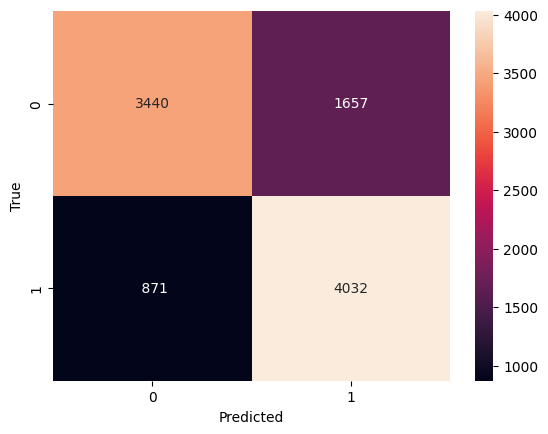

In [31]:
sns.heatmap(cm,annot=True,fmt='4g')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [33]:
print(classification_report(df["label"],df["compound_label"]))

              precision    recall  f1-score   support

         neg       0.80      0.67      0.73      5097
         pos       0.71      0.82      0.76      4903

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

